In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Create new data
np.random.seed(42)
x1 = np.random.rand(100)
x2 = np.random.rand(100)
x3 = np.random.rand(100)
x4 = np.random.rand(100)
noise = np.random.rand(100)
y = x1 + x2**2 + x3*x4

# Create a DataFrame
data = pd.DataFrame({'x1': x1, 'x2': x2, 'x3': x3, 'x4': x4, 'noise': noise, 'y': y})

In [3]:
# Create a Random Forest regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the data
rf.fit(data[['x1', 'x2', 'x3', 'x4', 'noise']], data['y'])

RandomForestRegressor(random_state=42)

In [4]:
# Get feature importances
importances = rf.feature_importances_

# Print the feature importances
print("Feature Importances:")
for i, feature in enumerate(data.columns[:-1]):
    print(f"Feature {feature}: {importances[i]}")

Feature Importances:
Feature x1: 0.43643349586236985
Feature x2: 0.4154696125011697
Feature x3: 0.05788006337606966
Feature x4: 0.0603756199370372
Feature noise: 0.029841208323353637


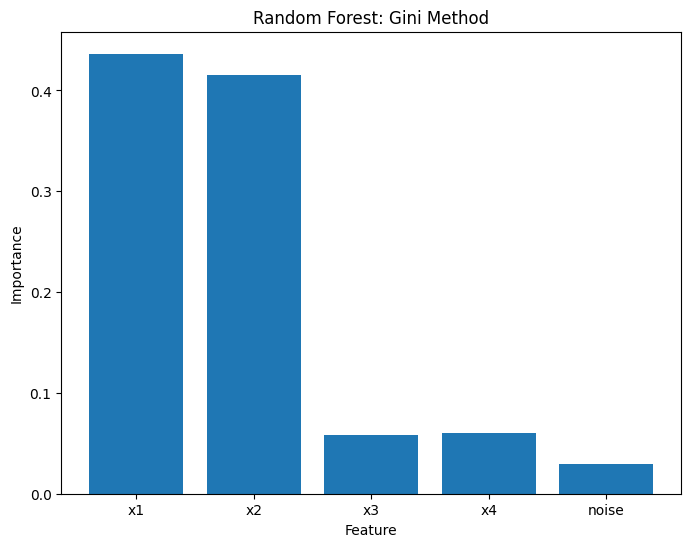

In [5]:
plt.figure(figsize=(8, 6))
plt.bar(data.columns[:-1], importances)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Random Forest: Gini Method")
plt.savefig("figs/random_forest_gini.png", format='png')
plt.show()

OOB Permutation Importances:
Feature x1: 0.7669790397127605
Feature x2: 0.8354813117536003
Feature x3: 0.06549755852445074
Feature x4: 0.06860799818594877
Feature noise: 0.013498180744290992


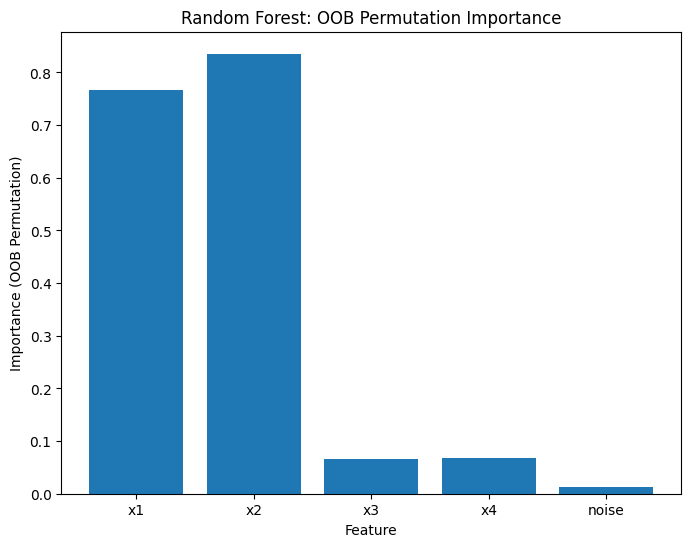

In [7]:
# Enable OOB scoring in the Random Forest
rf_oob = RandomForestRegressor(n_estimators=100, oob_score=True, random_state=42)
rf_oob.fit(data[['x1', 'x2', 'x3', 'x4', 'noise']], data['y'])

# Calculate permutation importance using the OOB-fitted model
oob_importance = permutation_importance(rf_oob, data[['x1', 'x2', 'x3', 'x4', 'noise']], data['y'], n_repeats=30, random_state=42)

# Print OOB-based permutation importances
print("OOB Permutation Importances:")
for i, feature in enumerate(data.columns[:-1]):
    print(f"Feature {feature}: {oob_importance.importances_mean[i]}")

# Plot OOB-based permutation importance
plt.figure(figsize=(8, 6))
plt.bar(data.columns[:-1], oob_importance.importances_mean)
plt.xlabel("Feature")
plt.ylabel("Importance (OOB Permutation)")
plt.title("Random Forest: OOB Permutation Importance")
plt.savefig("figs/random_forest_oob_permutation.png", format='png')
plt.show()
